Grau polinomial escolhido: 5  |  RMSE = 1.562e-05
Expoente k (log-log): 3.046  (~ n^3)
Polinômio (coeficientes de ordem decrescente):
[ 7.02535608e-15 -7.19942622e-12  5.14715281e-08 -4.33241857e-07
  1.31069822e-05 -9.95240143e-05]


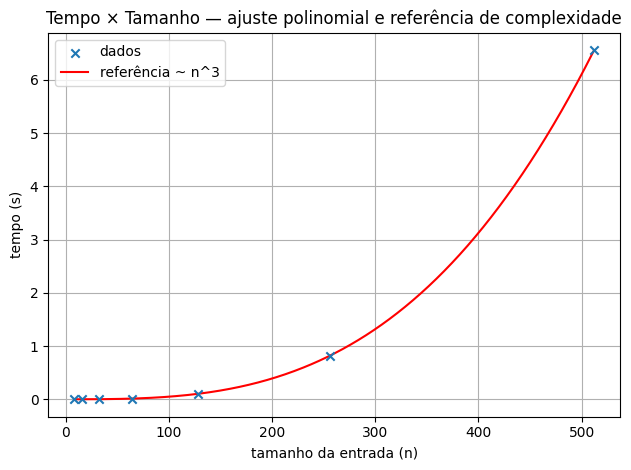

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Dados
# -----------------------------
n = np.array([8, 16, 32, 64, 128, 256, 512], dtype=float)
t = np.array([0.000020, 0.000178, 0.001576, 0.012339, 0.100733, 0.815215, 6.553873], dtype=float)

# -----------------------------
# Ajuste polinomial: escolhe grau (1..5) pelo menor RMSE
# -----------------------------
degrees = range(1, 6)
best_deg, best_rmse, best_coefs = None, np.inf, None

for d in degrees:
    coefs = np.polyfit(n, t, d)       # polinômio em n (mínimos quadrados)
    pred  = np.polyval(coefs, n)
    rmse  = np.sqrt(np.mean((pred - t)**2))
    if rmse < best_rmse:
        best_deg, best_rmse, best_coefs = d, rmse, coefs

p = np.poly1d(best_coefs)

# -----------------------------
# Estima expoente k de uma lei de potência t ≈ C * n^k (visual Big-O)
# via regressão linear em log-log: log t = k log n + b
# -----------------------------
k, b = np.polyfit(np.log(n), np.log(t), 1)   # k ~ expoente; e^b ~ constante
k_rounded = int(round(k))

# Ajusta a constante C para k_rounded por mínimos quadrados (uma variável):
# minimiza || t - C * n^k_rounded ||_2  => C = (n^k * t) / (n^(2k))
C = np.sum((n**k_rounded) * t) / np.sum(n**(2 * k_rounded))

# -----------------------------
# Plot
# -----------------------------
xx = np.linspace(n.min(), n.max(), 400)

plt.figure()
plt.scatter(n, t, label='dados', zorder=3, marker='x')
#plt.plot(xx, p(xx), label=f'ajuste polinomial (grau {best_deg})')
plt.plot(xx, C * (xx ** k_rounded), label=f'referência ~ n^{k_rounded}', color='r')
plt.xlabel('tamanho da entrada (n)')
plt.ylabel('tempo (s)')
plt.title('Tempo × Tamanho — ajuste polinomial e referência de complexidade')
plt.grid(True)
plt.legend()
plt.tight_layout()

print(f'Grau polinomial escolhido: {best_deg}  |  RMSE = {best_rmse:.3e}')
print(f'Expoente k (log-log): {k:.3f}  (~ n^{k_rounded})')
print('Polinômio (coeficientes de ordem decrescente):')
print(best_coefs)

plt.show()
